In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
test_size = 0.3
x=np.load('loaded_data/meld_full_x.npy') 
y=np.load('loaded_data/meld_full_y.npy') 
print(set(y))
x_train,x_test,temp_y_train,temp_y_test=train_test_split(np.array(x), y, test_size = test_size, random_state = 9)


{'happy', 'fear', 'sad', 'disgust', 'neutral', 'anger', 'surprise'}


In [19]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)

In [20]:
x_traincnn.shape, x_testcnn.shape

((6991, 180, 1), (2997, 180, 1))

In [21]:
y_test,y_train = [],[]
d={'neutral':0, 'sad':1, 'disgust':2, 'happy':3, 'anger':4, 'surprise':5,'fear':6}
for i in temp_y_test:
    y_test.append(d[i])
for i in temp_y_train:
    y_train.append(d[i])



In [22]:
len(x_traincnn[1])

180

In [23]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [24]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D,BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 3,padding='same',
                 input_shape=(len(x_traincnn[1]),1)))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Conv1D(16, 3,padding='same',))
model.add(Activation('sigmoid'))
model.add(Dropout(0.1))
model.add(Conv1D(8, 3,padding='same',))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Conv1D(128, 3,padding='same',))
model.add(Activation('sigmoid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(len(set(y))))
model.add(Activation('softmax'))
# opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 180, 128)          512       
                                                                 
 activation_3 (Activation)   (None, 180, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 180, 128)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 180, 16)           6160      
                                                                 
 activation_4 (Activation)   (None, 180, 16)           0         
                                                                 
 dropout_3 (Dropout)         (None, 180, 16)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 180, 8)           

In [26]:
 model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

In [27]:

history=model.fit(x_traincnn, 
                  y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_data=(x_testcnn, y_test))

Epoch 1/1000
437/437 [==============================] - 6s 10ms/step - loss: 3.6397 - accuracy: 0.3603 - val_loss: 1.6281 - val_accuracy: 0.4571
Epoch 2/1000
437/437 [==============================] - 3s 8ms/step - loss: 1.5488 - accuracy: 0.4713 - val_loss: 1.6730 - val_accuracy: 0.4678
Epoch 3/1000
437/437 [==============================] - 4s 8ms/step - loss: 1.5289 - accuracy: 0.4723 - val_loss: 3.8788 - val_accuracy: 0.4678
Epoch 4/1000
437/437 [==============================] - 4s 8ms/step - loss: 1.5228 - accuracy: 0.4728 - val_loss: 3.7655 - val_accuracy: 0.4678
Epoch 5/1000
437/437 [==============================] - 4s 9ms/step - loss: 1.5199 - accuracy: 0.4730 - val_loss: 1.5336 - val_accuracy: 0.4678
Epoch 6/1000
437/437 [==============================] - 5s 11ms/step - loss: 1.5140 - accuracy: 0.4728 - val_loss: 1.5582 - val_accuracy: 0.4681
Epoch 7/1000
437/437 [==============================] - 5s 11ms/step - loss: 1.5094 - accuracy: 0.4733 - val_loss: 1.5374 - val_accura

KeyboardInterrupt: 

In [ ]:
# model.save("nn_jl_1.h5")


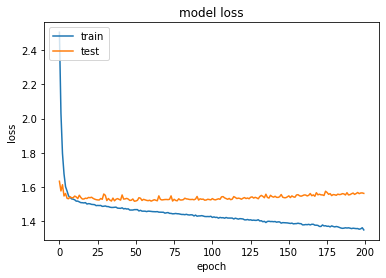

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
    import tensorflow as tf 

    if tf.test.gpu_device_name(): 

        print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

    else:

       print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


2022-04-10 15:47:17.964689: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 2694 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1
2022-04-10 15:47:17.968170: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 2694 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


In [ ]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

RuntimeError: Physical devices cannot be modified after being initialized